# Exercises: Classification
---
<br>


Today, we are going to practice what we have learned about classification. The tasks are split into two categories: *implementation of a classification algorithm from scratch* and *application of classifiers to a dataset and evaluating performance using sklearn*. 

While we haven't covered how to use ML libraries in the lectures, we are hoping that you can put everything you've learned from using numpy and matplotlib to practice when it comes to reading documentation. As usual, your friendly volunteers will be available for questions. 

#### Task 1: Implementing KNN from scratch. 

**Aims**:
1. Based on the way KNN works as described in the lectures, implement your own KNN. 
2. Compute accuracy for a particular K value. Again, accuracy is an easy to compute metric. Do that from scratch.
3. What's the effect of K on the accuracy? Plot that. 


The cells below read the data you are going to use for training and testing.

    

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

traindata = np.loadtxt('classification_data/trainx.csv',delimiter=',')
testdata = np.loadtxt('classification_data/testx.csv',delimiter=',')
trainX = traindata[:,:2]
traint = traindata[:,2]
testX = testdata[:,:2]
testt = testdata[:,2]

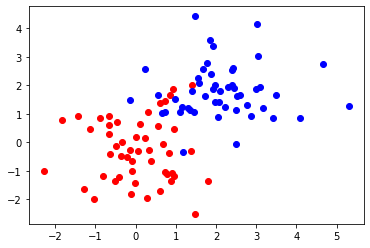

In [3]:
classes = {0:'ro',1:'bo'}
plt.figure()
for cl in classes:
    pos = np.where(traint == cl)[0]
    plt.plot(trainX[pos,0],trainX[pos,1],classes[cl])

#### Some hints: 

1. Might be easier to write a knn function for a single test example (a row in the testX)
2. Computing distances (you can do this like this to obtain a single numeric distance between a train point and a test point):  (trainPoints - testpoint)**2.sum(axis=1)
3. In the spirit of writing good functions, think of what parameters you need to pass to your knn function
4. For your accuracy implementation: remember that accuracy is correct predictions/total
5. Try a different range of K: e.g from 2 to 100


In [98]:
#getting k-values
k = 5

In [92]:
# calculate distance between points
distances = ((trainX - testX[0, :])**2).sum(axis=1)

In [93]:
#zip the distances to the traint
neighbours = list(zip(traint, distances))

In [96]:
neighbours = sorted(neighbours, key=lambda x: x[1])

In [118]:
from scipy.stats import mode

In [100]:
#neighbours_list = neighbours[:5]

In [117]:
#labels = traint[np.s_[:neighbours_list.index()]]

In [122]:
y_pred = []
nebor = []
for i in range(5):
    nebor.append(neighbours[i][1])  # appending K nearest neighbors
    y_pred.append(mode(nebor)[0])  # For Classification

y_pred

[array([0.02219949]),
 array([0.02219949]),
 array([0.02219949]),
 array([0.02219949]),
 array([0.02219949])]

In [123]:
nebor

[0.022199489985263873,
 0.023594228111560187,
 0.03819232217923667,
 0.08918604418798515,
 0.24309665588353524]

In [41]:
#dist_ance = []
#for i in range(0, len(trainX)):
#    dist_ance.append(((trainX[i] - testX[i,:])**2).sum())
#    #dist_ance += distance

### KNN using Sklearn

In [136]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

In [133]:
traindata = np.loadtxt('classification_data/trainx.csv',delimiter=',')
testdata = np.loadtxt('classification_data/testx.csv',delimiter=',')
trainX = traindata[:,:2]
traint = traindata[:,2]
testX = testdata[:,:2]
testt = testdata[:,2]

In [204]:
np.count_nonzero(traindata[traindata[:,2] == 1])

150

In [205]:
np.count_nonzero(traindata[traindata[:,2] == 0])

100

In [268]:
def knn(xtrain, ytrain, xtest, ytest):
    
    accuracy = []
    
    for i in range(1, 51):
        neigh = KNeighborsClassifier(n_neighbors=i)
        neigh.fit(xtrain, ytrain)
        pred_y = neigh.predict(xtest)
        score_ = accuracy_score(ytest, pred_y)
        accuracy.append(score_)
    print(f"The model accuracy is: {score_}")
    
    plt.plot(range(1,51), accuracy)
    plt.title("N-values (1-50) and accuracy scores")
    plt.show();
    
    return accuracy 

The model accuracy is: 0.88


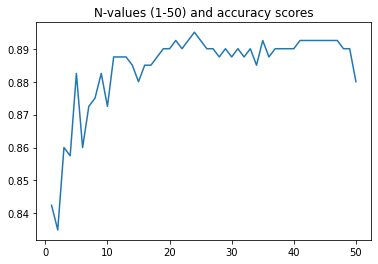

In [269]:
acc = knn(trainX, traint, testX, testt)

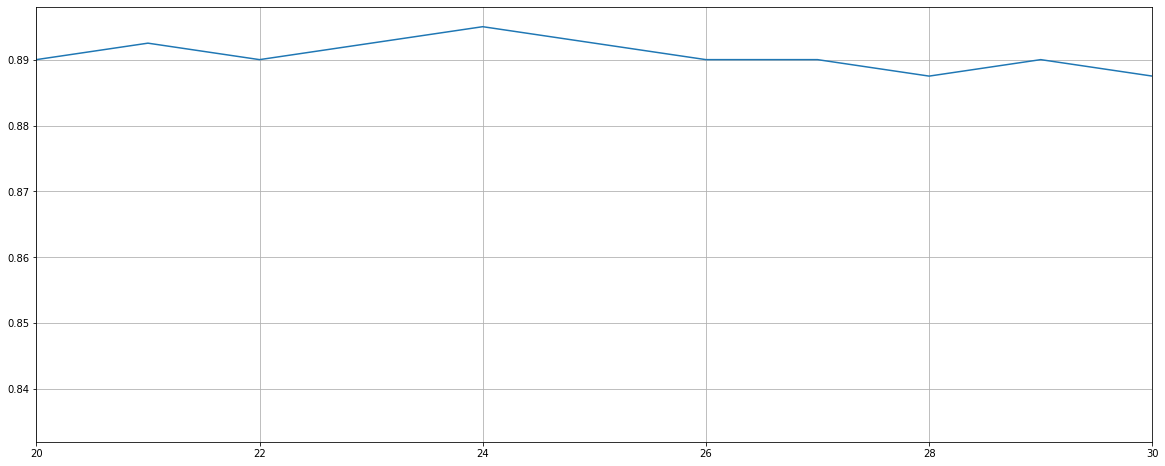

In [189]:
#zooming in to the plot
plt.figure(figsize=(20,8))
neighbours = range(1, 51)
plt.plot(neighbours, acc)
plt.grid("on")
plt.xlim(20,30)
plt.show();

From a neighbourhood of 1 to 50, the model performed best at a neighbourhood value of 24.

### Now to use n value of 24

In [272]:
def knneighbours(xtrain, ytrain, xtest, ytest, n):
      
    neigh = KNeighborsClassifier(n_neighbors=n)
    neigh.fit(xtrain, ytrain)
    pred_y = neigh.predict(xtest)
    score_ = accuracy_score(ytest, pred_y)
    print(f"The model accuracy is: {score_}") 
    
    plt.hist(pred_y)
    plt.hist(ytest, alpha=0.3)
    plt.title("Predicted Y vs Original Y")
    plt.legend(["Predicted Y", "Original Y"])
    plt.show()
        
    return 

The model accuracy is: 0.895


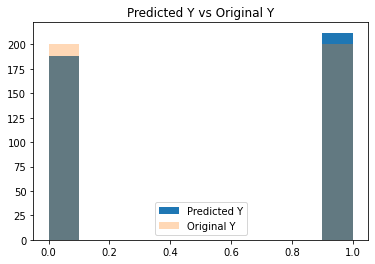

In [273]:
knneighbours(trainX, traint, testX, testt, 24)

### Adding prediction parameter

In [183]:
def knneighbours(xtrain, ytrain, xtest, ytest, prediction, n):
      
    neigh = KNeighborsClassifier(n_neighbors=n)
    neigh.fit(xtrain, ytrain)
    pred_y = neigh.predict(prediction)
    #score_ = accuracy_score(ytest, pred_y)
        
    return print(f"The model neighbourhood is: {pred_y}") 

In [184]:
a = np.empty([2, 2], dtype = float)

In [186]:
knneighbours(trainX, traint, testX, testt, a, 24)

The model neighbourhood is: [0. 1.]


#### Task 2: Getting familiar with sklearn. Exploring an example dataset, choosing some of the classifiers described in the morning session, and evaluating the performance of the chosen classifiers.

In many situations the machine learning algorithms we would like to use are readily available as part of existing libraries. And as with any other code, we don't want to reinvent the wheel as those libraries often take into consideration complex optimisations that can speed up the training of the algorithm of interest. 

Suggested steps: 
1. Import the data from sklearn
2. Don't forget to split your data into training and testing
3. Choose classifiers and compare performance. What performance metric are you going to use and why?

Note: Don't forget to add the necessary imports

In [1]:
from sklearn.model_selection import train_test_split

In [2]:
from sklearn import datasets
from sklearn.datasets import load_breast_cancer
input_, target= datasets.load_breast_cancer(return_X_y=True, as_frame=True) 

In [211]:
#cancer has data and targets
input_

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [215]:
X_train, X_test, y_train, y_test = train_test_split(input_, target, test_size=0.20, random_state=53)

The model accuracy is: 0.9298245614035088


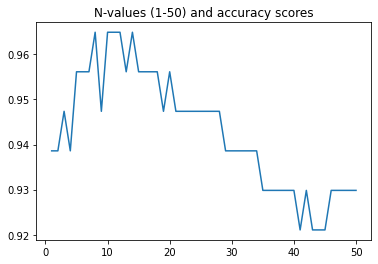

In [275]:
breast_cancer = knn(X_train, y_train, X_test, y_test)

In [258]:
def knneighbour(xtrain, ytrain, xtest, ytest, n):
      
    neigh = KNeighborsClassifier(n_neighbors=n)
    neigh.fit(xtrain, ytrain)
    pred_y = neigh.predict(xtest)
    score_ = accuracy_score(ytest, pred_y)
    print(f"The model accuracy is: {score_}") 
    
    plt.hist(pred_y)
    plt.hist(y_test, alpha=0.3)
    plt.legend(["Predicted Y", "Original Y"])
    plt.show()
    
    return

The model accuracy is: 0.9649122807017544


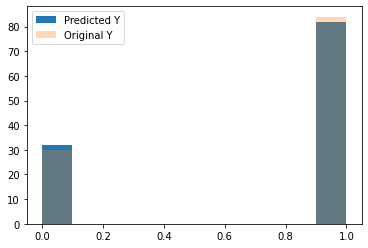

In [276]:
knneighbour(X_train, y_train, X_test, y_test, 8)

In [279]:
def knneighbour(xtrain, ytrain, xtest, ytest, prediction, n):
      
    neigh = KNeighborsClassifier(n_neighbors=n)
    neigh.fit(xtrain, ytrain)
    pred_y = neigh.predict(prediction)
    #score_ = accuracy_score(ytest, pred_y)
        
    return print(f"The model neighbourhood is: {pred_y}") 

In [281]:
canc = np.empty([1, 30], dtype = float)

In [283]:
knneighbour(X_train, y_train, X_test, y_test, canc, 9)

The model neighbourhood is: [1]


C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### Using SVM Classifier on Cancer dataset

In [3]:
from sklearn.svm import SVC

In [4]:
x_train, x_test, t_train, t_test = train_test_split(input_, target, test_size=0.20, random_state=47)

In [5]:
svm = SVC(kernel="linear")

In [6]:
svm.fit(x_train, t_train)

SVC(kernel='linear')

In [7]:
y_pred = svm.predict(x_test)

In [13]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [10]:
svm_accuracy = accuracy_score(t_test, y_pred)

In [11]:
svm_accuracy

0.956140350877193

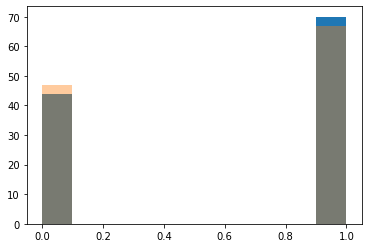

In [14]:
plt.hist(t_test)
plt.hist(y_pred, alpha=0.4)
plt.plot();

In [ ]:
svm.predict(canc)

Comparing accuracies 

- Accuracy for KNN is 0.9649
- Accuracy for SVC is 0.9561

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [18]:
cm = confusion_matrix(t_test, y_pred)

In [19]:
cm

array([[43,  1],
       [ 4, 66]], dtype=int64)

In [20]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)

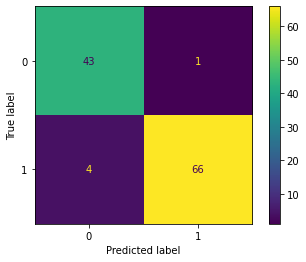

In [21]:
disp.plot()

In [26]:
a = np.empty([2, 30], dtype = float)

In [27]:
svm.predict(a)

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0, 1])